In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from IPython.display import clear_output

import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Circle
from matplotlib.animation import FFMpegWriter, PillowWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['animation.html'] = 'html5'
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':'nearest'})

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3
import scoobi.scoobi as scoobi

import lina


/opt/conda/envs/km310env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


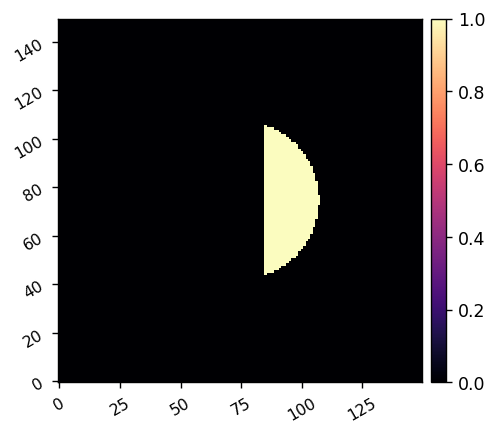

In [2]:
npsf = 150
pxscl = 0.307
iwa = 3
owa = 10
rot = 0
dh_mask = ensure_np_array(lina.utils.create_annular_focal_plane_mask(npsf, pxscl, irad=iwa, orad=owa, edge=iwa, rotation=rot))
imshow1(dh_mask)

im_lim = pxscl * npsf/2 
im_extent = [-im_lim, im_lim, -im_lim, im_lim]


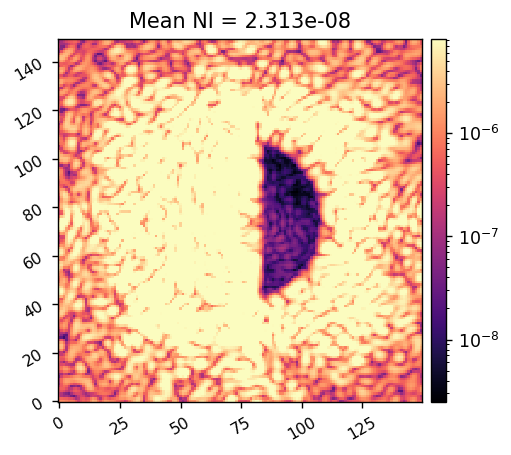

In [3]:
# date = 20240815
# coro_ims = xp.array(lina.utils.load_fits(f'camsci-streams/{date}_ims_with_llowfsc.fits'))

# coro_ims_wo_llowfsc = xp.array(lina.utils.load_fits(f'camsci-streams/{20241016}_ims_without_llowfsc.fits'))
# coro_ims_w_llowfsc = xp.array(lina.utils.load_fits(f'camsci-streams/{20241017}_ims_with_llowfsc.fits'))
# print(coro_ims_wo_llowfsc.shape, coro_ims_w_llowfsc.shape)

coro_ims_w_llowfsc = xp.array(lina.utils.load_fits(f'camsci-streams/{20241018}_ims_with_llowfsc.fits'))
mean_im = coro_ims_w_llowfsc[:].mean(axis=0)
mean_ni = np.mean(mean_im[dh_mask])
imshow1(mean_im, f'Mean NI = {mean_ni:.3e}', lognorm=True)

In [9]:
import matplotlib

def create_anim(data, cmap='magma',
                norm=None,
                extent=None,
                interval=500, # in ms
                ):
    numframes = data.shape[0]
    print(numframes)

    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=125)
    
    t = 0

    im2 = ax.imshow(data[0], norm=norm, cmap=cmap, extent=extent)
    mean_ni = np.mean(data[0][dh_mask])
    im2_title = ax.set_title(f'With LLOWFSC Normalized Image\nTime = {(t):.2f} min\nMean NI = {mean_ni:.2e}', fontsize=14)
    divider = make_axes_locatable(ax)
    cax2 = divider.append_axes("right", size="4%", pad=0.075)
    cbar2 = fig.colorbar(im2, cax=cax2)
    # ax[1].set_xticks([])
    # ax[1].set_yticks([])
    ax.add_patch(Circle((0,0), 3, fill=False, color='cyan'))
    ax.add_patch(Circle((0,0), 10, fill=False, color='cyan'))

    def animate(i):
        im2_arr = data[i]
        mean_ni = np.mean(im2_arr[dh_mask])
        im2.set_data(im2_arr)
        t = 5 * i/numframes
        im2_title.set_text(f'With LLOWFSC Normalized Image\nTime = {t:.2f} min\nMean NI = {mean_ni:.2e}')

    anim = matplotlib.animation.FuncAnimation(fig, animate, frames=numframes, interval=interval)
    return anim

In [13]:
300/coro_ims_w_llowfsc.shape[0]

1.0204081632653061

294


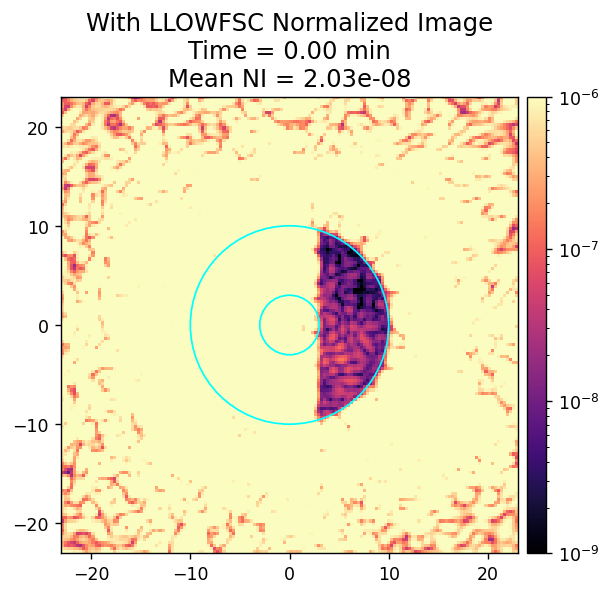

In [14]:

norm = LogNorm(vmin=1e-9, vmax=1e-6, clip=True)

anim = create_anim(ensure_np_array(coro_ims_w_llowfsc), 
                    cmap='magma',
                    norm=norm,
                    extent=im_extent,
                    interval=100, # in ms
                    )

In [15]:
anim

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 5.0 x 5.0 to 4.992 x 4.992
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 624x624 -pix_fmt rgba -framerate 10.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpqgq9_bzd/temp.m4v
